In [3]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

In [4]:
# Carregar o modelo NER para o reconhecimento de entidades em português
ner_model = pipeline("ner", model="monilouise/ner_pt_br")

Some weights of the model checkpoint at monilouise/ner_pt_br were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
# Carregar o dataset da Folha UOL News
df_news = pd.read_csv("archive/articles.csv")

In [6]:
df_news

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...
...,...,...,...,...,...,...
167048,"Em cenário de crise, tucano Beto Richa assume ...",O tucano Beto Richa tinha tudo para começar se...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167049,Filho supera senador Renan Calheiros e assume ...,O economista Renan Filho (PMDB) assume nesta q...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167050,"Hoje na TV: Tottenham x Chelsea, Campeonato In...",Destaques da programação desta quinta-feira (1...,2015-01-01,esporte,NaN,http://www1.folha.uol.com.br/esporte/2015/01/1...
167051,Kim Jong-un diz estar aberto a se reunir com p...,"O líder norte-coreano, Kim Jong-un, disse nest...",2015-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2015/01/156...


In [7]:
# Converter a coluna 'date' para tipo datetime
df_news['date'] = pd.to_datetime(df_news['date'])

In [8]:
# Filtrar apenas as notícias da seção "Mercado" no primeiro trimestre de 2015
df_market_news = df_news[(df_news['category'] == 'mercado') & 
                         (df_news['date'].dt.year == 2015) & 
                         (df_news['date'].dt.month.between(1, 3))]

In [9]:
df_market_news

,title,text,date,category,subcategory,link
99055,Prioridade ao pós-pago reduz número de linhas ...,"O mercado de telefonia celular perdeu 2,09 mil...",2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...
99063,Dilma sanciona meta fiscal e governo liberará ...,A presidente Dilma Rousseff sancionou a altera...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...
99064,Reportagem da Folha sobre investidor mais jove...,"A reportagem da Folha ""Príncipe da Bolsa"", de ...",2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...
99074,Impeachment pode prejudicar ajuste fiscal no B...,A abertura do processo de impeachment da presi...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...
99076,Petrobras anuncia 2º reajuste no preço do gás ...,A Petrobras comunicou ao mercado novo reajuste...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...
...,...,...,...,...,...,...
167000,"Em Miami, brasileiros gastam mais com compras ...",Chamam a atenção no caso do Brasil os gastos e...,2015-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...
167004,25% dos municípios brasileiros fecharam vagas ...,Cerca de um quarto dos municípios brasileiros ...,2015-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...
167013,Brasileiros lideram em número de turistas que ...,"""Em 2013, 51% dos turistas que foram a Miami e...",2015-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...
167016,Brasil só vai entrar nos eixos se fizer reform...,Em uma analogia entre a gestão pública e a emp...,2015-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...


In [10]:
# Inicializar uma lista para armazenar todas as organizações mencionadas
organizations = []

# Loop para aplicar o modelo NER às notícias filtradas, mostrando o progresso com tqdm
for text in tqdm(df_market_news['text'], desc="Processando Textos:"):
    # Aplicar o modelo NER ao texto da notícia
    ner_results = ner_model(text)
    # Inicializar uma lista para combinar tokens de entidades
    combined_entity = []
    # Iterar sobre os resultados do modelo NER
    for entity in ner_results:
        # Verificar se a entidade é do tipo organização
        if 'ORG' in entity['entity']:
            # Verificar se a lista combined_entity já contém tokens e se o token atual é um sub-token
            if combined_entity and combined_entity[-1].endswith('##'):
                # Continuar o token anterior ao adicionar a parte do token atual
                combined_entity[-1] += entity['word']
            elif entity['word'].startswith('##'):
                # Se o token atual é um sub-token, adicioná-lo ao último token existente
                if combined_entity:
                    combined_entity[-1] += entity['word'][2:]
                else:
                    # Se não houver token anterior, criar um novo token com a parte atual
                    combined_entity.append(entity['word'][2:])
            else:
                # Adicionar um novo token à lista combined_entity
                combined_entity.append(entity['word'])
        else:
            # Se a entidade não for uma organização, adicionar a entidade combinada à lista organizations
            if combined_entity:
                organizations.append(' '.join(combined_entity))
                combined_entity = []
    # Adicionar qualquer entidade combinada restante à lista organizations
    if combined_entity:
        organizations.append(' '.join(combined_entity))


Processando Textos::   0%|          | 0/2111 [00:00<?, ?it/s]

In [19]:
# Excluir a organização "Folha" da lista de organizações
organizations = [org for org in organizations if org != "Folha"]

In [20]:
# Filtrar e excluir organizações que têm apenas uma letra
all_organizations = [org for org in organizations if len(org) > 1]

In [21]:
# Contar a frequência de cada organização
org_counts = Counter(all_organizations)

In [22]:
# Criar um dataframe para facilitar a visualização
df_org_counts = pd.DataFrame(org_counts.items(), columns=['Organization', 'Frequency'])
df_org_counts = df_org_counts.sort_values(by='Frequency', ascending=False)

In [26]:
df_org_counts.head(10)

,Organization,Frequency
394,HSBC,46
546,Moody ' s,39
157,Bloomberg,38
149,Vale,21
198,BM & FBovespa,21
793,Sete,21
104,Volkswagen,19
37,McDonald ' s,18
145,S & P,17
273,Cifras & Letras,16


<Figure size 1000x600 with 0 Axes>

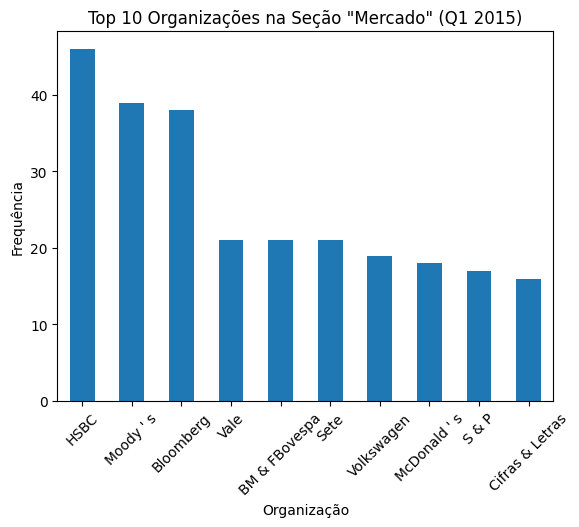

In [23]:
# Gerar visualizações
plt.figure(figsize=(10, 6))
df_org_counts.head(10).plot(kind='bar', x='Organization', y='Frequency', legend=False)
plt.title('Top 10 Organizações na Seção "Mercado" (Q1 2015)')
plt.xlabel('Organização')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Salvar o relatório
df_org_counts.to_csv('organization_ranking_q1_2015.csv', index=False)

In [27]:
# Gerar um relatório detalhado
report = f"""
Relatório de Análise de Organizações na Seção "Mercado" (Q1 2015)

Metodologia:
1. Carregamos os dados das notícias.
2. Filtramos as notícias da seção "Mercado" no primeiro trimestre de 2015.
3. Utilizamos um modelo NER (Reconhecimento de Entidades Nomeadas) para extrair nomes de organizações mencionadas nas notícias.
4. Filtramos as organizações com mais de uma letra.
5. Contamos a frequência de cada organização mencionada.
6. Geramos visualizações para apresentar os resultados.

Resultados:
As 10 organizações mais mencionadas foram:
{df_org_counts.head(10).to_string(index=False)}

A visualização gerada mostra a frequência das organizações mencionadas.

Conclusão:
Este relatório fornece uma visão detalhada das organizações mais mencionadas na seção "Mercado" no primeiro trimestre de 2015, com base nas notícias analisadas.
"""

with open('report_q1_2015.txt', 'w') as f:
    f.write(report)

print("Relatório gerado com sucesso!")

Relatório gerado com sucesso!
